In [1]:
import sys, os
%matplotlib inline 
import numpy as np
from astropy.io import ascii, fits
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
sys.path.append("/Volumes/k2_data/swarced") #assumes k2_data is mounted
#import swarced as sw


In [2]:
'''This will search through the file given an epic id and campaign and return the east and west pair if there is one 
or both or "0", "0" if none. 
In code, epicID and campaign should be integers'''
kelt_path = "/Volumes/kelt_data/"
matched_c0 = ascii.read(kelt_path + "matched_c0.dat")
matched_c2 = ascii.read(kelt_path + "matched_c2.dat")
def get_kelt(epic_id, campaign):
    #epic_id, campaign = str(epic_id), str(campaign)
    if campaign == 0:
        if epic_id in matched_c0['col1']:
            locat = np.argmax(matched_c0['col1'] == epic_id)
            return [matched_c0[locat]['col5'], matched_c0[locat]['col6']]
        else: #not in match
            return "0", "0"
    elif campaign == 1:
        return "0", "0"
    elif campaign == 2:
        if epic_id in matched_c2['col1']:
            locat = np.argmax(matched_c2['col1'] == epic_id)
            return [matched_c2[locat]['col5'], matched_c2[locat]['col6']]
        else: #not in match
            return "0", "0"
    else: #not in campaign 0, 1, or 2
        return "0", "0"

In [3]:
'''This will retrieve the data of either the paired east and west data sets or the single east or west data set. It will 
print "can't plot" if there was no corresponding filename to the given epic id and campaign'''

def retrieve_kelt(epic_id, campaign, version='tfa'):
    fn = get_kelt(epic_id, campaign) #loads get_kelt
    if fn == ["0", "0"]: #no data corresponds to this EPIC ID, will return 0
        return 0, 'Data not found'
    elif 'nan' in fn: #one data set (either east or west) was found, will return 1
        choice = (fn.index("nan") + 1 ) % 2 #will find nan in the two returned filenames and select the non-nan filename
        if version == 'tfa':
            fn[choice] = "_".join(fn[choice].split("_")[:-1]) + "_tfa.dat" #will change the filename to include raw
        if_nan = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/"+ fn[choice]) #loads the data
        
        return 1, if_nan, "east" if choice==0 else "west" 
    
    else: #it had both east and west data
        
        if version == 'tfa':
            fn[0] = "_".join(fn[0].split("_")[:-1]) + "_tfa.dat" #changes the filename to include tfa
            fn[1] = "_".join(fn[1].split("_")[:-1]) + "_tfa.dat" #changes the filename to include tfa
        east = ascii.read(kelt_path + "c" +str(campaign) + "/"+ version +"/" + fn[0]) #loads east data
        west = ascii.read(kelt_path + "c" +str(campaign) + "/"+ version +"/" + fn[1]) #loads west data
        return 2, east, west

In [4]:
'''This code plots the kelt data without including loading the data, requires retrieve_kelt to run'''

def plot_kelt2(epic_id, campaign, version='tfa'):
    rk = retrieve_kelt(epic_id, campaign, version) #connects to retrieve_kelt function
    if rk[0] == 0: #since we set in retrieve_kelt the EPIC ids that returned no data to return 0 this loads that
        print ('plotting not possible') #shows user there was no associated EPIC id/campaign in the KELT set
    elif rk[0] == 1: #based on retrieve_kelt where one data set was associated with the EPIC id
        time, mag, mag_err = rk[1]['col1'], rk[1]['col2'], rk[1]['col3'] #defines the time, magnitude and magnitude error to their corresponding files
        plt.scatter(time, mag/np.median(mag), c='black', label = rk[2], lw =0.1) #creates scatter plot of magnitude vs time, labeling it depending on whether the data is east or west(the choise function)
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time), max(time))
        plt.ylim(1 + 0.5*np.std(mag), 1 - 0.5*np.std(mag)) #standard deviation
        plt.xlabel('Barycentric Julian Date')
        plt.ylabel('Relative Magnitude')
        plt.legend()
        plt.show()
    else: #it was in the list (ie has both west and east)
        east, west = rk[1], rk[2] #defines east and west from variables in retrieve_kelt function
        time_e, mag_e, mag_err_e = east['col1'],east['col2'],east['col3'] #defines time, magnitude, and magnitude error to corresponding data in retrieve_kelt
        time_w, mag_w, mag_err_w = west['col1'],west['col2'],west['col3']
        plt.scatter(time_e, mag_e/np.median(mag_e),c='black',label= 'east', lw=0.1)
        plt.scatter(time_w, mag_w/np.median(mag_w), c="darkgrey",label= 'west', lw=0.1)
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time_e), max(time_e))
        plt.ylim(1+0.5*np.std(mag_e), 1-0.5*np.std(mag_e))
        plt.xlabel("Barycentric Julian Date")
        plt.ylabel("Relative Magnitude")
        plt.legend()
        plt.show()


In [5]:
'''This will plot the data of either the paired east and west data sets or the single east or west data set. It will 
print "can't plot" if there was no corresponding filename to the given epic id and campaign'''
def plot_kelt(epic_id, campaign, version='tfa'):
    fn = get_kelt(epic_id, campaign)
    if fn == ("0", "0"):
        print ('Data  not found, plotting not possible')
    elif 'nan' in fn:
        choice = (fn.index("nan") + 1 ) % 2
        if version == 'tfa':
            fn[choice] = "_".join(fn[choice].split("_")[:-1]) + "_tfa.dat"
            
        if_nan = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/"+ fn[choice])
        time, mag, mag_err = if_nan['col1'], if_nan['col2'], if_nan['col3']
        plt.scatter(time, mag/np.median(mag), c='black', label = "east" if choice==0 else "west", lw =0.1)
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time), max(time))
        plt.ylim(1 + 0.5*np.std(mag), 1 - 0.5*np.std(mag))
        plt.xlabel('Barycentric Julian Date')
        plt.ylabel('Relative Magnitude')
        plt.legend()
        plt.show()
    else: #it was in the list
        if version == 'tfa':
            fn[0] = "_".join(fn[0].split("_")[:-1]) + "_tfa.dat"
            fn[1] = "_".join(fn[1].split("_")[:-1]) + "_tfa.dat"
    
        east = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/" + fn[0])
        west = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/" + fn[1])
        #time_k2, relflux_k2 = sw.retrieve(epic_id, campaign, inpath="/Volumes/k2_data/lightcurves")
        #mag_k2 = relflux_k2 / np.median(relflux_k2)
        time_e, mag_e, mag_err_e = east['col1'],east['col2'],east['col3']
        time_w, mag_w, mag_err_w = west['col1'],west['col2'],west['col3']
        plt.scatter(time_e, mag_e/np.median(mag_e),c='black',label= 'east', lw=0.1)
        plt.scatter(time_w, mag_w/np.median(mag_w), c="darkgrey",label= 'west', lw=0.1)
        #plt.scatter(time_k2, mag_k2, c=???, ...
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time_e), max(time_e))
        plt.ylim(1+0.5*np.std(mag_e), 1-0.5*np.std(mag_e))
        #plt.gca().invert_yaxis()
        plt.xlabel("Barycentric Julian Date")
        plt.ylabel("Relative Magnitude")
        plt.legend()
        plt.show()

In [6]:
import remove_EB as remEB
def plot_phase(epic_ID,campaign,period, t0, inpath ="/k2_data/lightcurves/"):
    #Plots a period folded curve
    rk = retrieve_kelt(epic_ID, campaign, version='tfa') #connects to the retrieve_kelt function
    epic_ID,campaign = str(epic_ID),str(campaign) #converts to strings
    if rk[0] == 0: #when EPIC id is not associated with any data
        print "EPIC id is not associated with any data"
    if rk[0] == 1: #when only set of data type (east or west)
        time, flux = rk[1]['col1'], rk[1]['col2']/np.median(rk[1]['col2']) #defines the corresponding time and flux
        
    #time, flux = retrieve_kelt(epic_id, campaign, version='tfa')
    if rk[0] == 2:
        time, flux = np.append(rk[1]['col1'], rk[2]['col1']), np.append(rk[1]['col2']/np.median(rk[1]['col2']), rk[2]['col2']/np.median(rk[2]['col2']))
        #previous line connects (appends) the west and east times and fluxes so they are one data set
    fig = plt.figure(figsize=(5 * 1.61803398875,5))
    plt.title("EPIC " + epic_ID)
    phase = remEB.find_phase(time, period, t0)
    plt.plot((phase + 0.25) % 1 - 0.25,flux,'k.',ms=10)
    plt.gca().invert_yaxis()
    plt.xlabel("Phase")
    plt.ylabel("FM15 Flux")
    plt.show()

In [7]:
def retrieve(epicID, campaign, inpath="/Volumes/k2_data/lightcurves/", tail="", injected=False):
    '''Provides access to the time and flux data from a light curve given the EPIC ID and campaign'''
    campaign = str(campaign)
    epicID = str(epicID)
    #if it's in the default path
    if inpath == "/Volumes/k2_data/lightcurves/":
        path = inpath + "c" + campaign + "/" +  epicID[0:4] + "00000/" + epicID[4:6] + "000/" 
    else:#designate the full path
        path = inpath
    #construct the filename
    fn = path + "ktwo" + epicID + "-c0" + campaign + "_lpd-lc" + tail + ".fits"
    f = fits.open(fn)
    aperture = np.argmin(f[2].data['cdpp6'])
    time, flux = f[1].data['time'] + f[1].header['BJDREFI'], f[1].data['flux'][:,aperture]
    quality = f[1].data['quality']
    m = np.isfinite(time) * np.isfinite(flux) * (quality==0)
    if injected:
        transits = list(f[3].data['center'] + f[1].header['BJDREFI'])
    f.close()
    if not injected:
        return time[m], flux[m]
    else: #was injected
        return time[m], flux[m], transits

def plot_phase_k2(epicID,campaign,period, t0, inpath ="/Volumes/k2_data/lightcurves/",tail=""):
    '''Plots a period folded curve'''
    epicID,campaign = str(epicID),str(campaign)
    time, flux = retrieve(epicID,campaign,inpath,tail)
    fig = pl.figure(figsize=(5 * 1.61803398875,5))
    pl.title("EPIC " + epicID)
    phase = remEB.find_phase(time, period, t0)
    pl.plot((phase + 0.25) % 1 - 0.25,flux,'k.',ms=10)
    pl.xlabel("Phase")
    pl.ylabel("FM15 Flux")
    pl.show()
    
def plot_lc(epicID, campaign, inpath="/Volumes/k2_data/lightcurves/",mark_list=[],tail="",injected=False):
    '''Plots the best lightcurve from photometry'''
    epicID,campaign = str(epicID),str(campaign)
    if not injected:
        time, flux = retrieve(epicID,campaign,inpath,tail)
    else:
        time, flux, transits = retrieve(epicID,campaign,inpath,tail,injected=True)
    fig = pl.figure(figsize=(5 * 1.61803398875,5))
    pl.title("EPIC " + epicID)
    pl.plot(time,flux,'k.',ms=10)
    pl.xlabel("Time (BJD)")
    pl.ylabel("FM15 Flux")
    pl.plot(mark_list, np.median(flux) + np.zeros(len(mark_list)),'r*',markersize=20)
    if injected:
        pl.plot(transits, np.median(flux) + np.zeros(len(transits)),'r*',markersize=20)
    pl.ylim(min([np.min(flux),np.median(flux)-0.5*np.std(flux)]), 
            max([np.max(flux),np.median(flux)+0.5*np.std(flux)]))
    pl.show()
    del mark_list

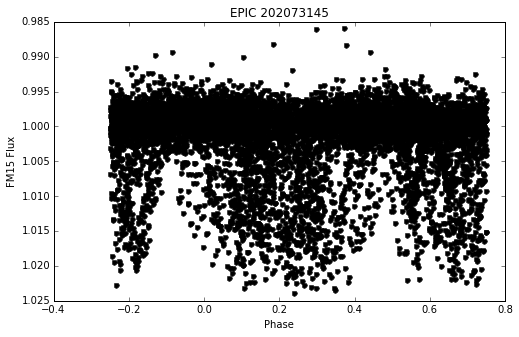

In [8]:
plot_phase(202073145, 0, 1.52, 56774.583 + 2400000)

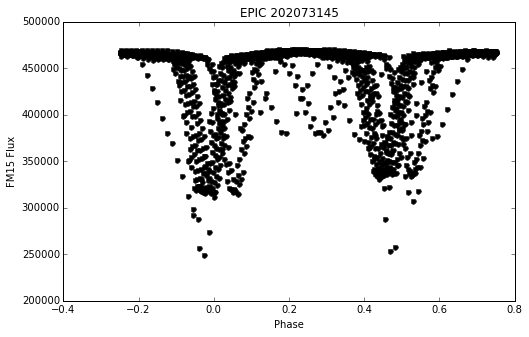

In [17]:
plot_phase_k2(202073145, 0, 1.52, 56774.583 + 2400000)

In [10]:
np.linspace(1.58-0.1,1.52+0.1,10)

array([ 1.48      ,  1.49555556,  1.51111111,  1.52666667,  1.54222222,
        1.55777778,  1.57333333,  1.58888889,  1.60444444,  1.62      ])

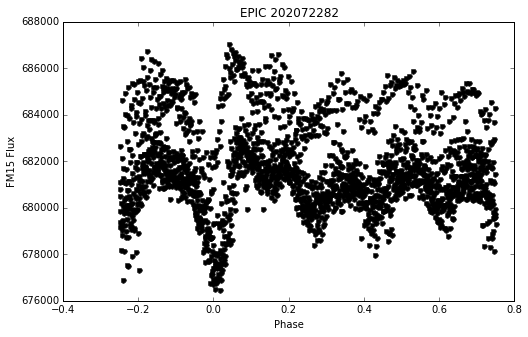

5.97


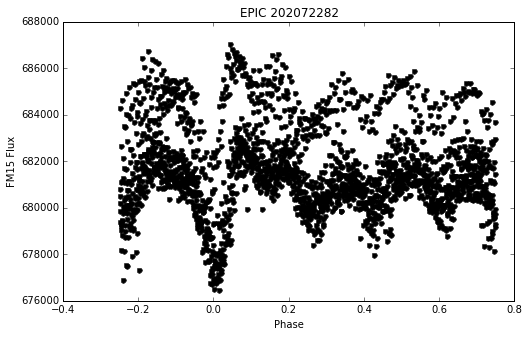

5.97222222222


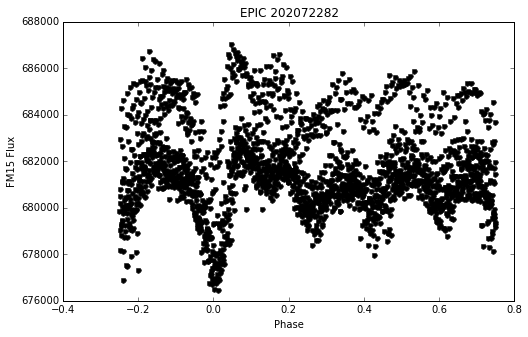

5.97444444444


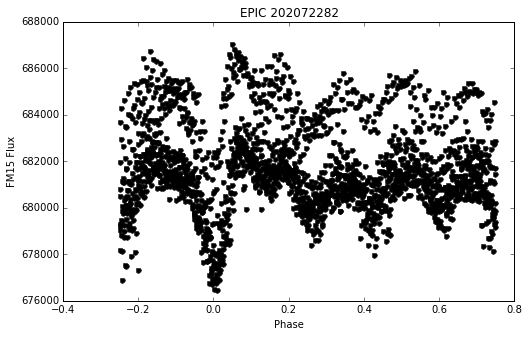

5.97666666667


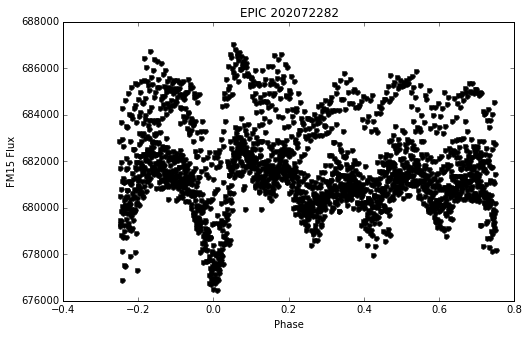

5.97888888889


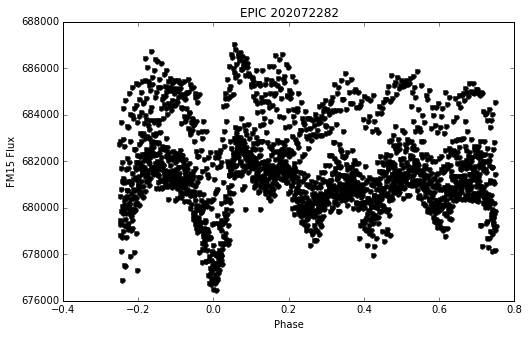

5.98111111111


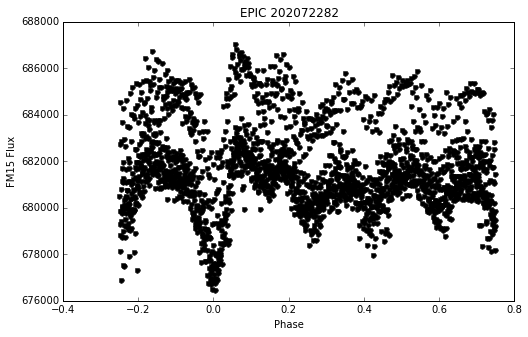

5.98333333333


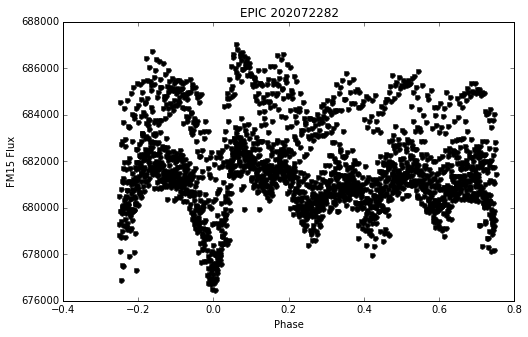

5.98555555556


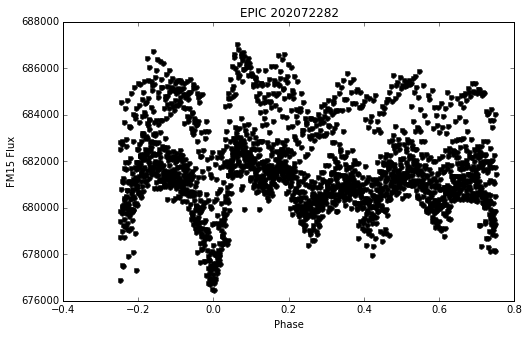

5.98777777778


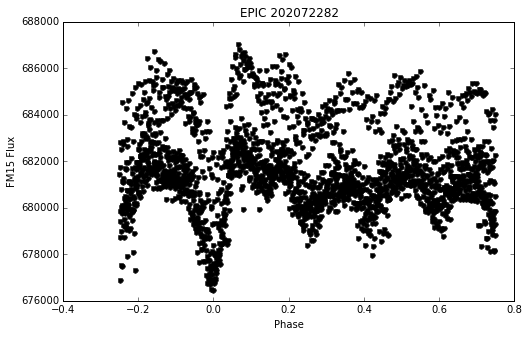

5.99


In [11]:
p, offset = 5.98,0.01
period_range = np.linspace(p-offset,p+offset,10)
for period in period_range:
    plot_phase_k2(202072282, 0, period, 56772.319 + 2400000) 
    print period

In [12]:
#period_range_k2(202073145, 0, 1.52, 56774.583 + 2400000)

In [13]:
#overlap = ascii.read("/Users/nbanale1-temp/Documents/k2_kelt_overlap.txt")
def period_range_k2(epicID,campaign,period, t0, inpath ="/Users/nbanale1-temp/Documents/k2_kelt_overlap.txt"):
    for column['Period'] in period_range_k2:
        #period = 'Period' - 0.05
        period_range = range('Period' - 0.05, 'Period' + 0.5, 0.01)
        plot_phase_k2(epicID,campaign,period_range, t0, inpath ="/Volumes/k2_data/lightcurves/",tail="")

In [14]:
period_range_k2(202073145, 0, 1.52, 56774.583 + 2400000)

TypeError: 'function' object is not iterable

In [ ]:
plot_phase(202064535, 0, 0.508, 56774.511 + 2400000) #both east and west

In [ ]:
plot_lc(202064535, 0)

In [ ]:
plot_phase_k2(202064535, 0, 0.508, 56774.511 + 2400000)

In [ ]:
plot_phase(202091545, 0, 1.86, 56775.909 + 2400000) #only east

In [ ]:
rk = retrieve_kelt(202091545, 0)
time, flux = rk[1]['col1'], rk[1]['col2']/np.median(rk[1]['col2'])
time += 2450000
#plt.plot(time, "k.")
phase = remEB.find_phase(time, 1.86, 56775.909 + 2400000)
plt.plot(phase[600:1400], flux[600:1400], "k.")

In [ ]:
'''#open txt file
#for all indices
#for row in range(len(txtfile)):
#   id, period, t0 = txtfile[row]['EPICID'], txtfile[row]['PERIOD']
#    plot_phase(id, 0, period, t0, inpath="/Volumes/kelt_data/c0/tfa/")
#OTHER WAY:
#for row in txtfile:
#   plot_phase(row['EPICID'], 0, row['period']...
    #get id & period & t0 from txt file

overlap = ascii.read("/Users/nbanale1-temp/Documents/k2_kelt_overlap.txt")
for row in overlap:
    kelt_path(row["EPIC_ID"], 0, row["Period"], row["BJD0"], "/Users/nbanale1-temp/Documents/k2_kelt_overlap.txt")
#return "EPIC_ID", "Period", "BJD0"'''

In [ ]:
get_kelt(202073217, 0)
